In [1]:
import cv2 as cv
from matplotlib import pyplot as plt
import numpy as np

In [20]:
img = cv.imread("images/horse.png")
all_img = cv.imread("images/horses.jpg")
gray_img, all_gray_img = cv.cvtColor(img, cv.COLOR_BGR2GRAY), cv.cvtColor(all_img, cv.COLOR_BGR2GRAY)

_, img_tresh = cv.threshold(gray_img, 127, 255, cv.THRESH_BINARY)
img_contours, img_hierarchy = cv.findContours(img_tresh, cv.RETR_CCOMP, cv.CHAIN_APPROX_SIMPLE)

_, all_img_tresh = cv.threshold(all_gray_img, 127, 255, cv.THRESH_BINARY)
all_img_contours, all_img_hierarchy = cv.findContours(all_img_tresh, cv.RETR_CCOMP, cv.CHAIN_APPROX_SIMPLE)

In [21]:
cv.drawContours(img, img_contours, -1, color=(0, 255, 0), thickness=1)
cv.imshow('img_countours', img)
cv.drawContours(all_img, all_img_contours, -1, color=(0, 255, 0), thickness=1)
cv.imshow('all_img_countours', all_img)

cv.waitKey(0)
cv.destroyAllWindows()

In [32]:
cv.imshow('trexh', tresh)
cv.imshow('img', cv.imread("images/horses.jpg"))
cv.waitKey(0)
cv.destroyAllWindows()

In [22]:
most_similar = float('inf')
contour1, contour2 = all_img_contours[0], img_contours[0]

for i, all_img_contour in enumerate(all_img_contours):
    for j, img_contour in enumerate(img_contours):
        similarity =  cv.matchShapes(all_img_contour, img_contour, cv.CONTOURS_MATCH_I1, 0.0)
        if similarity < most_similar:
            most_similar = similarity
            contour1, contour2 = all_img_contours[i], img_contours[j]
            print(f"(all_img_countours[{i}] == img_countours[{j}]) = Simlarity Score: {most_similar:.5f}")

cv.drawContours(all_img, [contour1], -1, (0, 245, 240), 1)
cv.drawContours(img, [contour2], -1, (50, 168, 168), 1)
cv.imshow('all_img, [countour1]', all_img)
cv.imshow('img, [countour2]', img)

cv.waitKey(0)
cv.destroyAllWindows()

(all_img_countours[0] == img_countours[0]) = Simlarity Score: 1.07411
(all_img_countours[0] == img_countours[1]) = Simlarity Score: 0.53449
(all_img_countours[0] == img_countours[3]) = Simlarity Score: 0.36456
(all_img_countours[1] == img_countours[3]) = Simlarity Score: 0.28754
(all_img_countours[3] == img_countours[0]) = Simlarity Score: 0.11354
(all_img_countours[3] == img_countours[1]) = Simlarity Score: 0.04070
(all_img_countours[6] == img_countours[0]) = Simlarity Score: 0.00100
(all_img_countours[6] == img_countours[1]) = Simlarity Score: 0.00000
(all_img_countours[8] == img_countours[3]) = Simlarity Score: 0.00000


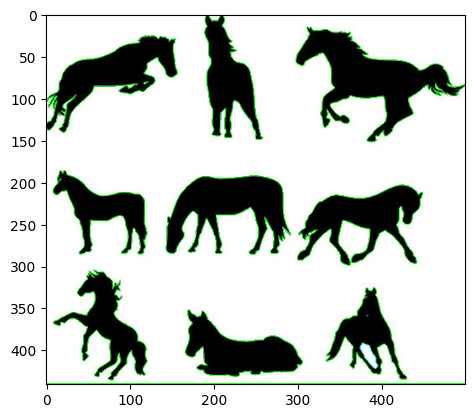

In [5]:
plt.imshow(all_img)